In [6]:
import gzip

import pymarc
import matplotlib.pyplot as plt;
import numpy as np

import ujson;
import json;
import gzip
import importlib
# importlib.reload(pymarc)
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [7]:
import bgzf
import struct
import os
import ujson
from tqdm.auto import tqdm
from os.path import join as PJ
dataPath = PJ("..","Data","Processed")
os.makedirs(dataPath, exist_ok=True)

In [8]:
def getTagSubtag(data,subtag,onErrorParent=True):
    if(isinstance(data,dict)):
      value = None
#       try: 
      if(subtag not in data):
        value = None;
      else:
        value = data[subtag];
#       except:
#         print((subtag,data));
#         raise error;
      return value;
    else:
      if(onErrorParent):
        return data;
      else:
        return None;

def getFirst(data,tag):
  value = None;
  if(tag in data):
    if(isinstance(data[tag],list)):
      value = data[tag][0];
    else:
      value = data[tag];
  return value;
  

def getAll(data,tag):
  value = [];
  if(tag in data):
    if(isinstance(data[tag],list)):
      value = data[tag];
    else:
      value = [data[tag]];
  return value;


def getEntry(data,tag,subtags=None,isList=False, onErrorParent=True):
  if(tag not in data):
    return None;
  if(subtags is not None):
    if(isList):
      dataList = getAll(data,tag);
      resultList = [];
      for dataValue in dataList:
        if(isinstance(subtags,dict)):
          resultEntry = {}
          for key in subtags:
            subTagResult = getTagSubtag(dataValue,subtags[key],onErrorParent);
            if(subTagResult):
              resultEntry[key] = subTagResult;
          resultList.append(resultEntry);
        else:
          subTagResult = getTagSubtag(dataValue,subtags,onErrorParent);
          if(subTagResult):
            resultList.append(subTagResult);
      return resultList
    else:
      dataValue = getFirst(data,tag);
      if(isinstance(subtags,dict)):
        resultEntry = {}
        for key in subtags:
          subTagResult = getTagSubtag(dataValue,subtags[key],onErrorParent);
          if(subTagResult):
            resultEntry[key] = subTagResult;
        return resultEntry;
      else:
        subTagResult = getTagSubtag(dataValue,subtags,onErrorParent);
        if(subTagResult):
          return subTagResult;
  else:
    if(isList):
      return getAll(data,tag);
    else:
      return getFirst(data,tag);

In [9]:
def processHEP(entryData):
  outData = {}
  
  propertyName = "ID"
  outData[propertyName] = getEntry(
    entryData,
    "001",
    subtags=None,
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "DOI"
  outData[propertyName] = getEntry(
    entryData,
    "024",
    subtags={
      "Value": "a",
      "Type": "p",
    },
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Category"
  outData[propertyName] = getEntry(
    entryData,
    "037",
    subtags="c",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "FirstAuthor"
  outData[propertyName] = getEntry(
    entryData,
    "100",
    subtags={
      "ID": "x",
      "Name": "a",
      "Institution ID": "z",
      "ORCID": "k",
      "Email": "m",
    },
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Authors"
  outData[propertyName] = getEntry(
    entryData,
    "700",
    subtags={
      "ID": "x",
      "Name": "a",
      "Institution ID": "z",
      "ORCID": "k",
      "Email": "m",
    },
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Title"
  outData[propertyName] = getEntry(
    entryData,
    "245",
    subtags="a",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "PublicationDate"
  outData[propertyName] = getEntry(
    entryData,
    "260",
    subtags="c",
    isList=False,
    onErrorParent=True
  )

  propertyName = "PreprintDate"
  outData[propertyName] = getEntry(
    entryData,
    "269",
    subtags="c",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "NumberOfPages"
  outData[propertyName] = getEntry(
    entryData,
    "300",
    subtags="a",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "Degree"
  outData[propertyName] = getEntry(
    entryData,
    "500",
    subtags={
      "Type":"b",
      "Institution":"b",
      "Year":"d",
      "Institution ID":"z",
    },
    isList=False,
    onErrorParent=False
  )

#     outData[propertyName] = getEntry(
#       entryData,
#       "520",
#       subtags="a",
#       isList=False,
#       onErrorParent=True
#     )
    
  propertyName = "Classification"
  outData[propertyName] = getEntry(
    entryData,
    "650",
    subtags="a",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Keywords"
  outData[propertyName] = getEntry(
    entryData,
    "653",
    subtags="a",
    isList=True,
    onErrorParent=True
  )
  
  propertyName = "Experiment"
  outData[propertyName] = getEntry(
    entryData,
    "693",
    subtags="e",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Accelerator"
  outData[propertyName] = getEntry(
    entryData,
    "693",
    subtags="a",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Beam line"
  outData[propertyName] = getEntry(
    entryData,
    "693",
    subtags="b",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "ControlledKeywords"
  outData[propertyName] = getEntry(
    entryData,
    "695",
    subtags="a",
    isList=True,
    onErrorParent=True
  )
  
  propertyName = "ControlledKeywords"
  outData[propertyName] = getEntry(
    entryData,
    "695",
    subtags="a",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "EnergyRange"
  outData[propertyName] = getEntry(
    entryData,
    "695",
    subtags="e",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "ThesisSupervisor"
  outData[propertyName] = getEntry(
    entryData,
    "701",
    subtags="a",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "Collaborations"
  outData[propertyName] = getEntry(
    entryData,
    "710",
    subtags="g",
    isList=True,
    onErrorParent=True
  )
  
  propertyName = "Type"
  outData[propertyName] = getEntry(
    entryData,
    "980",
    subtags="a",
    isList=True,
    onErrorParent=True
  )
  
  propertyName = "References"
  outData[propertyName] = getEntry(
    entryData,
    "999",
    subtags={
      "ID": "0",
      "Journal ID": "1",
      "DOI": "a",
      "Year": "y",
      "Journal": "s",
    },
    isList=True,
    onErrorParent=False
  )
  

#   if("041" in entryData):
#     outData["Language"] = entryData["041"];

  return outData;



In [10]:
def processInstitution(entryData):
  outData = {}
  
  propertyName = "ID"
  outData[propertyName] = getEntry(
    entryData,
    "001",
    subtags=None,
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "Geolocation"
  outData[propertyName] = getEntry(
    entryData,
    "034",
    subtags={
      "Lon": "d",
      "Lat": "f",
      "Source": "2",
      "Type": "q",
    },
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Name"
  outData[propertyName] = getEntry(
    entryData,
    "110",
    subtags="u",
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "InstitutionData"
  outData[propertyName] = getEntry(
    entryData,
    "110",
    subtags={
      "Institution": "a",
      "Department": "b",
      "ICN": "t",
    },
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Address"
  outData[propertyName] = getEntry(
    entryData,
    "371",
    subtags={
      "Address": "a",
      "City": "b",
      "State": "c",
      "Country": "d",
      "PostalCode": "e",
      "CountryCode": "g",
    },
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Field"
  outData[propertyName] = getEntry(
    entryData,
    "372",
    subtags="a",
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Accronyms"
  outData[propertyName] = getEntry(
    entryData,
    "410",
    subtags="a",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Extra"
  outData[propertyName] = getEntry(
    entryData,
    "410",
    subtags="g",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "Related"
  outData[propertyName] = getEntry(
    entryData,
    "510",
    subtags={
      "type":"w",
      "ID":"0"
    },
    isList=True,
    onErrorParent=False
  )

  propertyName = "URL"
  outData[propertyName] = getEntry(
    entryData,
    "856",
    subtags="u",
    isList=False,
    onErrorParent=False
  )
  
  propertyName = "Tags"
  outData[propertyName] = getEntry(
    entryData,
    "980",
    subtags="a",
    isList=True,
    onErrorParent=True
  )
  
  return outData;




In [11]:
def processData(entryData):
  outData = {}
  
  propertyName = "ID"
  outData[propertyName] = getEntry(
    entryData,
    "001",
    subtags=None,
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "Title"
  outData[propertyName] = getEntry(
    entryData,
    "245",
    subtags="a",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "PublicationDate"
  outData[propertyName] = getEntry(
    entryData,
    "260",
    subtags="c",
    isList=False,
    onErrorParent=True
  )

  propertyName = "PreprintDate"
  outData[propertyName] = getEntry(
    entryData,
    "269",
    subtags="c",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "NumberOfPages"
  outData[propertyName] = getEntry(
    entryData,
    "300",
    subtags="a",
    isList=False,
    onErrorParent=True
  )
  
  propertyName = "Collaborations"
  outData[propertyName] = getEntry(
    entryData,
    "710",
    subtags="g",
    isList=True,
    onErrorParent=True
  )
  
  propertyName = "Experiment"
  outData[propertyName] = getEntry(
    entryData,
    "693",
    subtags="e",
    isList=True,
    onErrorParent=False
  )
  
  propertyName = "MainPublication"
  outData[propertyName] = getEntry(
    entryData,
    "786",
    subtags="w",
    isList=False,
    onErrorParent=False
  )

#   if("041" in entryData):
#     outData["Language"] = entryData["041"];

  return outData;

In [12]:

# with gzip.open("../Data/HEP-records.xml.gz","r") as fd:
#   data = ujson.loads(ujson.dumps(xmltodict.parse(fd.read())));

from pymarc import map_xml

# with gzip.open("../Data/HEP-records.xml.gz","r") as fd:
#   from pymarc import MARCReader

def readMARC(filename, parseFunction,estimated=1362493):
  entry = None;
  entries = [];
  thefield = None
  allKeys = {};
  allKeysExample = {};
  allKeysListCount = {};
  pbar = tqdm(total=estimated);
  with gzip.open(filename,"r") as fd:
    def print_title(r):
      nonlocal entry,entries,thefield,allKeys,allKeysExample,allKeysListCount,pbar
      pbar.update(1);
      entry = r;
      # print(r["961"].format_field())
      # fout.write(r.title()+"\n")
      keysSet = set();
      keysCount = {};
      keysContent = {};
      entryData = {};

      for field in r.fields:
        thefield = field;
        tag = field.tag;
        content = field.format_field();
        if(tag not in keysSet):
          keysSet.add(tag);
          keysCount[tag] = 0;
          keysContent[tag] = content;
        keysCount[tag] += 1;
  #           fout.write("\t%s: %s\n"%(tag,content));
        try:
          subfields = {};
          subfieldsLetter = {};
          if(len(field.subfields)>0):
            for subfieldIndex in range(0,len(field.subfields),2):
              subfieldName = field.subfields[subfieldIndex];
              subfieldValue = field.subfields[subfieldIndex+1];
              subTag = tag+"."+subfieldName;
              if(subTag not in keysSet):
                keysSet.add(subTag);
                keysCount[subTag] = 0;
                keysContent[subTag] = subfieldValue;
              keysCount[subTag] += 1;
              subfields[subTag] = subfieldValue;
              subfieldsLetter[subfieldName] = subfieldValue;
            if(tag in entryData):
              if(not isinstance(entryData[tag], list)):
                entryData[tag] = [entryData[tag]];
              entryData[tag].append(subfieldsLetter);
            else:
              entryData[tag] = subfieldsLetter;
  #               fout.write("\t\t%s: %s\n"%(subfieldName,subfieldValue));
        except AttributeError as error:
          pass
        
        if(len(subfields)==0):
          if(tag in entryData):
            if(not isinstance(entryData[tag], list)):
              entryData[tag] = [entryData[tag]];
            entryData[tag].append(content);
          else:
            entryData[tag] = content;
  #       fout.write("-----\n");

  #       fout.flush();
  #       entries.append(entry);
      for key in keysSet:
        if(key not in allKeys):
          allKeys[key] = 0;
          allKeysExample[key] = keysContent[key];
          allKeysListCount[key] = 0
        allKeysListCount[key] += keysCount[key];
        allKeys[key]+=1;
      processedEntry = parseFunction(entryData);
#       processedEntry["raw"] = entryData;
      entries.append(processedEntry)
#       raise ValueError()
    map_xml(print_title, fd)
  return (entries,allKeys,allKeysExample,allKeysListCount);


In [13]:

import re;
import urllib;
import time;
import json;
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def WOSGeocodeAddressNominatim(address):
	nominatimURL = 'http://nominatim.openstreetmap.org/search/';

	queryString = urllib.parse.urlencode({
		"q": address,
		"format": "json",
		"addressdetails": "1",
		"email": "filipinascimento@gmail.com",
		"accept-language": "en",
		"limit": "1",
		"extratags": "0"
	});

	time.sleep(0.75);
	queryURL = nominatimURL + '?' + queryString;
	fURL = urllib.request.urlopen(queryURL);
	structure = json.loads(fURL.read().decode("utf-8"));
	fURL.close();

	if(len(structure)>0):
		return structure[0];
	else:
		return None;


def WOSGeocodeAddress(address):
	location=None;
	newAddress = None;
	usedAddress = None;
	if(address!=None):
		newAddress = address;
		while(location is None and len(newAddress)>0):
			location = WOSGeocodeAddressNominatim(newAddress);
			usedAddress = newAddress;
			newAddress = ",".join(newAddress.split(",")[1:]);
		newAddress = address;
		while(location is None and len(newAddress)>0):
				location = WOSGeocodeAddressNominatim(newAddress);
				usedAddress = newAddress;
				newAddress = ",".join(newAddress.split(",")[0:-1]);
		findPostalCode = re.compile("([0-9]+)[ ,]");
		if(address!=None and len(findPostalCode.findall(address))>0):
			(location,usedAddress) = WOSGeocodeAddress(findPostalCode.sub("",address));
	return (location,usedAddress);

In [14]:
def savebgzip(filepath,entries):
  with bgzf.open(filepath,"wb") as fd:
      for entry in tqdm(entries):
          data = ujson.dumps(entry).encode("utf8");
          fd.write(struct.pack("<Q",len(data)))
          fd.write(data)
          
def loadbgzip(filepath,estimatedEntries=1362493):
  entries=[];
  with bgzf.open(filepath,"rb") as fd:
    pbar = tqdm(total=estimatedEntries);
    while True:
        pbar.update(1);
        sizeBuffer = fd.read(8*1);
        if(len(sizeBuffer)==8*1):
            dataSize = struct.unpack("<Q",sizeBuffer)[0];
            data = fd.read(dataSize);
            entry = ujson.loads(data.decode("utf8"));
            entries.append(entry);
        else:
            break; 
  return entries;

In [15]:
HEPBGZ = processedBGZ = PJ(dataPath,"HEP.bgzip");
institutionsBGZ = PJ(dataPath,"Institutions.bgzip");
dataBGZ = PJ(dataPath,"Data.bgzip");
namesBGZ = PJ(dataPath,"Names.bgzip");

In [60]:
HEPEntries,allKeys,allKeysExample,allKeysListCount = readMARC("../Data/HEP-records.xml.gz",processHEP)
# savebgzip(HEPBGZ,HEPEntries)

Problem with: =000  


In [44]:
institutionsEntries,allKeys,allKeysExample,allKeysListCount = readMARC("../Data/Institutions-records.xml.gz",processInstitution)
savebgzip(institutionsBGZ,institutionsEntries)

In [97]:
dataEntries,allKeys,allKeysExample,allKeysListCount = readMARC("../Data/Data-records.xml.gz",processData,estimated=83782)
savebgzip(dataBGZ,dataEntries)

In [18]:
HEPNames,allKeys,allKeysExample,allKeysListCount = readMARC("../Data/HepNames-records.xml.gz",processHEP)
savebgzip(namesBGZ,HEPNames)

Problem with: =000  


In [90]:
# experimentsEntries,allKeys,allKeysExample,allKeysListCount = readMARC("../Data/Experiments-records.xml.gz",processHEP)
# savebgzip(institutionsBGZ,institutionsEntries)

In [16]:
HEPEntries = loadbgzip(HEPBGZ);
institutionsEntries = loadbgzip(institutionsBGZ);
dataEntries = loadbgzip(dataBGZ);

In [52]:
aa = [hep for hep in HEPEntries if hep["Experiment"] and "Experiment" not in hep["Experiment"][0]]

In [ ]:
for key in sorted(allKeys.keys()):
  padding = ""
  if(key.find(".")>0):
    padding="    "
  isList = " "
  if(allKeysListCount[key]>allKeys[key]):
    isList = "*"
    
  if(allKeys[key]>=100):
    print("%s%s: %6d (%3.1f%%) %3.0f%s (%s)"%(padding,key,allKeys[key],allKeys[key]/allKeys["001"]*100,allKeysListCount[key]/allKeys[key],isList,allKeysExample[key] ))


In [35]:
[entry for entry in institutionsEntries if "Field" in entry]

[]

In [97]:
# len([entry for entry in institutionsEntries if entry["Geolocation"] is None])
# len([entry["Collaborations"] for entry in HEPEntries if entry["Collaborations"] is not None and "ATLAS" in set(entry["Collaborations"])])
# [entry for entry in experimentsEntries if entry["Title"] is not None and 'CORE' in set(entry["Type"])];
# np.savetxt("experimentNames.txt",[entry["Title"] for entry in experimentsEntries],fmt="%s")
# [entry["Experiment"] for entry in HEPEntries if entry["Experiment"] is not None];
# loadedEntries[500000]["Authors"]
# test = [];
# for i in tqdm(range(len(entries))):
#     if(loadedEntries[i]!=entries[i]):
#         print("Error");
#         break;
# entry.subjects()[1].format_field()
# entries[851230]

In [98]:
# Explore data
# for key in sorted(allKeys.keys()):
#   padding = ""
#   if(key.find(".")>0):
#     padding="    "
#   isList = " "
#   if(allKeysListCount[key]>allKeys[key]):
#     isList = "*"
    
#   if(allKeys[key]>=1000):
#     print("%s%s: %6d (%3.1f%%) %3.0f%s (%s)"%(padding,key,allKeys[key],allKeys[key]/allKeys["001"]*100,allKeysListCount[key]/allKeys[key],isList,allKeysExample[key] ))
# 
# import matplotlib.pyplot as plt;
# import numpy as np
# plt.hist(years, bins=list(range(1950,2022)))
# plt.show()

In [62]:
for entry in institutionsEntries:
  if(entry["Field"] is None):
    if(entry["Name"].lower().find("coll.")>=0):
      entry["Field"] = "College"

In [230]:
np.savetxt("institutionsNoType.txt",[entry["Name"] for entry in institutionsEntries if entry["Field"] is None],fmt="%s")

In [63]:
count=0;
for entry in tqdm(institutionsEntries):
  if entry["Geolocation"] is None and entry["Address"] is not None:
    address = entry["Name"];
    entryAddress = entry["Address"];
    if("Address" in entryAddress and entryAddress["Address"] is not None):
      address+=", ".join(entry["Address"].values())
    geocode = WOSGeocodeAddress(address);
    entry["geocode"] = geocode;
#     count+=1;
#     if(count>=10):
#       break
      
# [entry["Name"]+", "+", ".join(entry["Address"].values()) for entry in institutionsEntries if entry["Geolocation"] is None and entry["Address"] is not None][0]
for entry in tqdm(institutionsEntries):
  if "geocode" in entry:
    geocode = entry["geocode"][0];
    if(geocode is not None):
      entry["geotype"] = geocode["type"]
      entry["Geolocation"] = {'Lon': geocode["lon"], 'Lat': geocode["lat"]}

In [65]:
savebgzip(HEPBGZ,HEPEntries)

In [48]:
allcollaborations = set();
for entry in HEPEntries:
  if(entry["Collaborations"] is not None):
    allcollaborations.update(entry["Collaborations"])
np.savetxt("collaborationsList.txt",list(allcollaborations),fmt="%s")

In [91]:
setExperiments = set()
for entry in HEPEntries:
#   if(entry["Experiment"] and len(entry["Experiment"])>1):
#     print(entry["Experiment"])
  if(entry["Experiment"]):
    filtered = [value for value in entry["Experiment"] if value.lower().find("babar")>=0]
    setExperiments.update(set(filtered))
#     allcollaborations.update(entry["Experiment"])

In [92]:
setExperiments

{'BABAR',
 'SLAC-BABAR-PEP2',
 'SLAC-PEP2-BABAR',
 'SLAC-PEP2-BaBar',
 'SLAC-PEPII-BABAR'}

In [121]:
project2experiment = {
  "ATLAS": {
    'ATLAS',
    'ATLAS-Probe',
    'CEN-LHC-ATLAS',
    'CER-LHC-ATLAS',
    'CERN -LHC-ATLAS',
    'CERN-ATLAS',
    'CERN-CMS-ATLAS',
    'CERN-HL-LHC-ATLAS',
    'CERN-LEP-ATLAS',
    'CERN-LHC-ATLAS',
    'CERN-SLHC-ATLAS',
  },
  "Virgo-Ligo": {
    'LIGO',
    'VIRGO'
  },
  "IceCube": {
    'ICECUBE',
    'ICECUBE-PINGU',
    'ICECUBe',
    'IceCube',
    'icecube'
  },
  "BaBar": {
    'BABAR',
    'SLAC-BABAR-PEP2',
    'SLAC-PEP2-BABAR',
    'SLAC-PEP2-BaBar',
    'SLAC-PEPII-BABAR'
  }
}

In [45]:
import re
years=[];
for entry in tqdm(HEPEntries):
    year = None;
    date = None
    if("PublicationDate" in entry and entry["PublicationDate"] is not None):
        date = entry["PublicationDate"]
        match = re.match(r'.*([1-3][0-9]{3})', date)
        if match is not None:
            year = int(match.group(1));
    if (year is None):
        if("PreprintDate" in entry and entry["PreprintDate"] is not None):
            date = entry["PreprintDate"]
            match = re.match(r'.*([1-3][0-9]{3})', date)
            if match is not None:
                year = int(match.group(1));
    entry["Year"] = year
    years.append(year);

In [47]:
ID2citations = {}
for entry in tqdm(HEPEntries):
  references = entry["References"]
  if(references):
    if(entry["Year"] == None):
      year = 0
    else:
      year = int(entry["Year"])
    for reference in references:
      if('ID' in reference):
        try:
          referenceID = int(reference["ID"].split("$")[0])
          if(referenceID not in ID2citations):
            ID2citations[referenceID] = []
          ID2citations[referenceID].append(year)
        except ValueError as e:
          print("Error for:")
          print(reference)
          pass;


Error for:
{'ID': '10.1117/12.820455', 'Year': '2009'}
Error for:
{'ID': 'doi:10.1117/12.2313414', 'Year': '2018'}
Error for:
{'ID': 'doi:10.1117/12.2312971', 'Year': '2018'}
Error for:
{'ID': 'doi:10.1117/12.2312993', 'Year': '2018'}
Error for:
{'ID': 'doi:10.1364/AO.47.006251', 'Year': '2008', 'Journal': 'Appl.Opt.,47,6251-6256'}
Error for:
{'ID': 'doi:10.1007/s10762-016-0320-7', 'Year': '2017', 'Journal': 'J.Infra.Mill.Tera.Waves,38,215-228'}
Error for:
{'ID': 'doi:10.1051/anphys/195012050596', 'Year': '1950', 'Journal': 'Annales Phys.(France),12,596-640'}
Error for:
{'ID': 'doi:10.1364/AO.45.008907', 'Year': '2006', 'Journal': 'Appl.Opt.,45,8907-8915'}
Error for:
{'ID': 'doi:10.1007/BF02066662', 'Year': '1995', 'Journal': 'Int.J.Infrared MM Waves,16,863-877'}
Error for:
{'ID': 'doi:10.1364/AO.48.002006', 'Year': '2009', 'Journal': 'Appl.Opt.,48,2006-2013'}
Error for:
{'ID': '1280958 999C6', 'DOI': '0-0-0-1-0-0-1', 'Year': '2014', 'Journal': 'Phys.Rev.Lett.,113,142502'}
Error for:
{

In [51]:
citIter = iter(ID2citations.items())

In [103]:
HEPEntriesByCollaboration.keys()

dict_keys(['babar', 'virgo+ligo', 'atlas', 'icecube'])

In [105]:
collaborationName = "atlas"
colaborationWithName = set()
count =0
for entry in tqdm(HEPEntries):
    if(entry["Collaborations"] is not None):
      foundWord = False;
#       collaborations = "|".join(entry["Collaborations"]).lower();
      collaborationsSet = set({name.lower() for name in entry["Collaborations"]})
      if(len(collaborationsSet.intersection(collaborationName.split("+")))):
#       for word in collaborationName.split("+"):
#         for name in entry["Collaborations"]:
#           if(name.lower().find(word)>=0):
#           if(name.lower()==word):
        foundWord=True;
#         break;
#         if(foundWord):
#           break;
      if(foundWord):
        colaborationWithName.update(collaborationsSet.intersection(collaborationName.split("+")))
        count+=1
colaborationWithName,count

({'atlas'}, 6087)

In [ ]:
collaborationName = "atlas"
colaborationWithName = set()
count =0
for entry in tqdm(HEPEntries):
    if(entry["Collaborations"] is not None):
      foundWord = False;
      collaborations = "|".join(entry["Collaborations"]).lower();
#       collaborationsSet = set({name.lower() for name in entry["Collaborations"]})
#       if(len(collaborationsSet.intersection(collaborationName.split("+")))):
      for word in collaborationName.split("+"):
        for name in entry["Collaborations"]:
          if(name.lower().find(word)>=0):
#           if(name.lower()==word):
            foundWord=True;
            break;
        if(foundWord):
          break;
      if(foundWord):
        colaborationWithName.add(name)
        count+=1
count,colaborationWithName

Processing BaBar


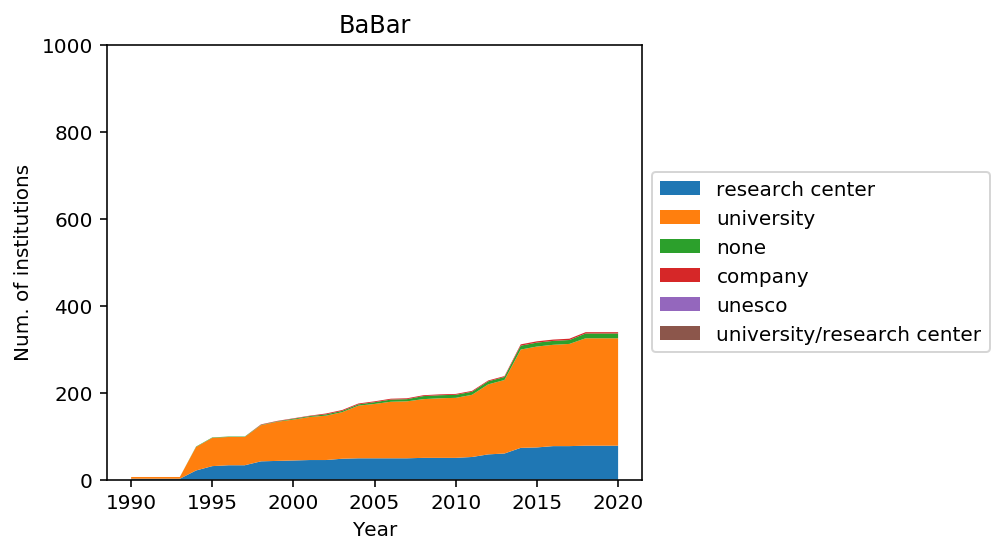

Processing Virgo-Ligo


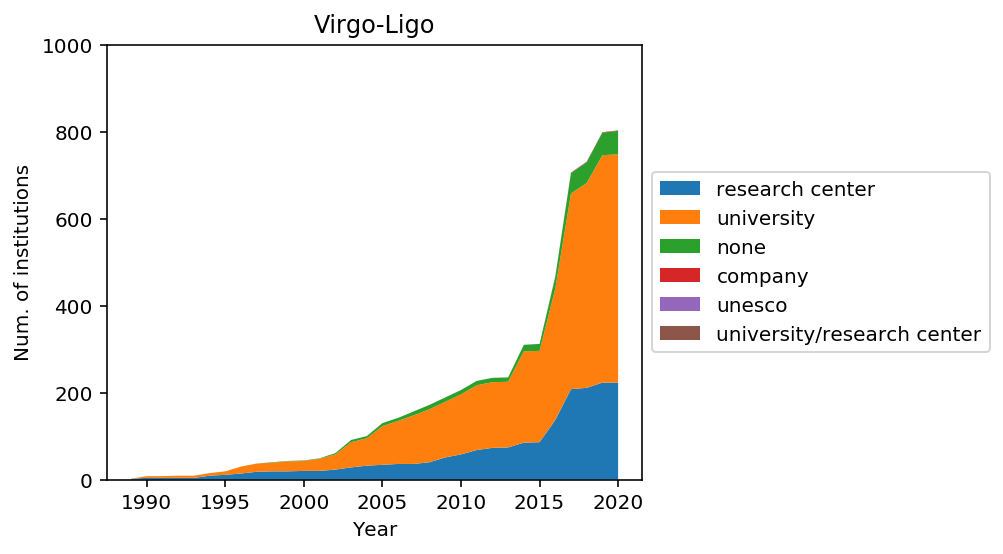

Processing ATLAS


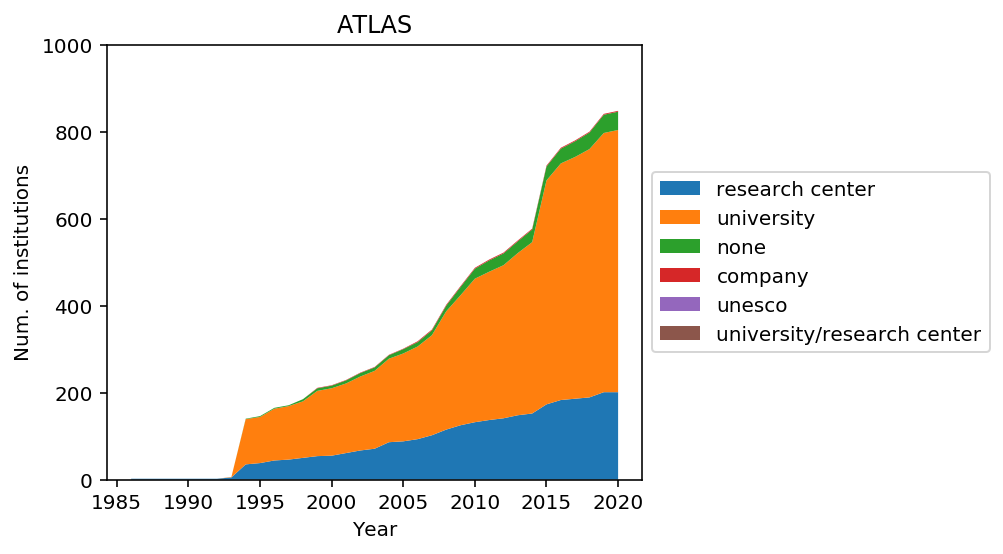

Processing IceCube


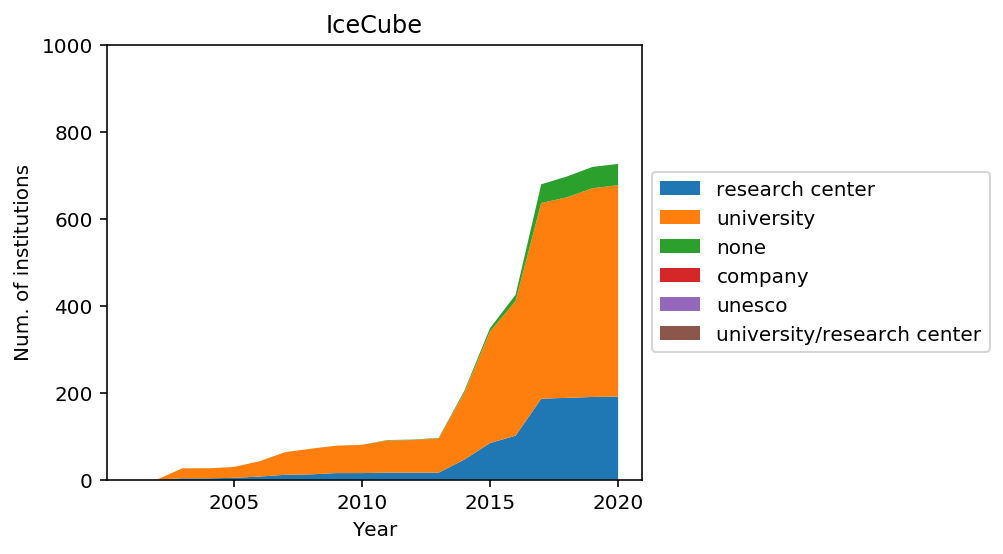

In [167]:
from collections import Counter
# collaborationWords = ["virgo","ligo"]
collaborationWordsSets = {
  "BaBar":"babar+babar collaborarion",
  "Virgo-Ligo":"virgo+ligo+virgo scientific+ligo scientific",
  "ATLAS":"atlas+atlas experiment",
  "IceCube":"icecube"
}
saveNetwork = True;

plotCategory = "Field"
HEPEntriesByCollaboration = {};
dataEntriesByCollaboration = {};
authorCountsByProject = {};
authorParticipatingCountsByProject = {};
authorAllTimeCountsByProject = {};
citationsPerYearByProject = {};
for collaborationName,collaborationWords in collaborationWordsSets.items():
  print("Processing "+collaborationName)
  minYear = 0;
  finalYear = 0;
  collaborationExperiments = project2experiment[collaborationName];
  collaborationHEPEntries = [];
  citationsPerYear = Counter()
  citationsPerYearByProject[collaborationName] = citationsPerYear;
  for entry in tqdm(HEPEntries):
    if(entry["Collaborations"] is not None):
      foundWord = False;
#       collaborations = " ".join(entry["Collaborations"]).lower();
#       for word in collaborationWords.split("+"):
#           if(collaborations.find(word)>=0):
#             foundWord=True;
#             break;
      collaborationsSet = set({name.lower() for name in entry["Collaborations"]})
      if(len(collaborationsSet.intersection(collaborationWords.split("+")))):
        foundWord=True;
      if(foundWord):
        collaborationHEPEntries.append(entry);
    elif(entry["Experiment"] is not None):
      experiments = set(entry["Experiment"]);
      if(len(collaborationExperiments.intersection(experiments))>0):
        collaborationHEPEntries.append(entry);
        
  collaborationDataEntries = [];
  for entry in tqdm(dataEntries):
    if(entry["Collaborations"] is not None):
      foundWord = False;
#       collaborations = " ".join(entry["Collaborations"]).lower();
#       for word in collaborationName.split("+"):
#           if(collaborations.find(word)>=0):
#             foundWord=True;
#             break;
      collaborationsSet = set({name.lower() for name in entry["Collaborations"]})
      if(len(collaborationsSet.intersection(collaborationWords.split("+")))):
        foundWord=True;
      if(foundWord):
        collaborationDataEntries.append(entry);
    elif(entry["Experiment"] is not None):
      experiments = set(entry["Experiment"]);
      if(len(collaborationExperiments.intersection(experiments))>0):
        collaborationHEPEntries.append(entry);

  HEPEntriesByCollaboration[collaborationName] = collaborationHEPEntries;
  dataEntriesByCollaboration[collaborationName] = collaborationDataEntries;
  institutionsLists = [];
  authorsLists = [];
  collaborationYears = [];
  for entry in tqdm(collaborationHEPEntries):
    authors = [];
    if "FirstAuthor" in entry and entry["FirstAuthor"] is not None:
        authors += [entry["FirstAuthor"]];

    if "Authors" in entry and entry["Authors"] is not None:
        authors += entry["Authors"];

    institutionIDs = [int(author["Institution ID"]) for author in authors if "Institution ID" in author and author["Institution ID"] is not None]
    authorIDs = [int(author["ID"]) for author in authors if "ID" in author and author["ID"] is not None]
    institutionsLists.append(institutionIDs);
    authorsLists.append(authorIDs);
    collaborationYears.append(entry["Year"]);

  if(minYear==0):
    minYear = min([year for year in collaborationYears if year is not None]);


  if(finalYear==0):
    finalYear = max([year for year in collaborationYears if year is not None]);

  institutionsDict = {int(entry["ID"]):entry for entry in institutionsEntries}

  indexToInstitution = [];
  institutionToIndex = {};
  for entry in tqdm(institutionsLists):
    for institution in set(entry):
      if(institution not in institutionToIndex):
        institutionToIndex[institution] = len(institutionToIndex);
        indexToInstitution.append(institution)

  
  from itertools import combinations
  edgesWeights = {}
  
  

  
  plotAuthorsByYear = {};
  participatingAuthorsByYear = {};
  for i in tqdm(range(len(institutionsLists))):
    entry = institutionsLists[i];
    institutionsIDs = set(entry) # use set for 1 weight per article
    authorEntry = authorsLists[i];
    authorsIDs = set(authorEntry) # use set for 1 weight per article
    institutionsEdges = combinations(institutionsIDs,2);
    year = collaborationYears[i];
    if(year not in plotAuthorsByYear):
      plotAuthorsByYear[year] = set();
      participatingAuthorsByYear[year] = set();
    plotAuthorsByYear[year].update(authorsIDs);
    participatingAuthorsByYear[year] = set(authorsIDs);
    for fromVertex,toVertex in institutionsEdges:
      if(fromVertex!=toVertex):
        edge = min(fromVertex,toVertex),max(fromVertex,toVertex),year;
        if(edge not in edgesWeights):
          edgesWeights[edge] = 0.0;
        edgesWeights[edge]+=1.0/len(institutionsIDs);
    
  plotAuthorsYears = [];
  plotParticipatingAuthorsCount = [];
  plotCumulativeAuthorsCount = [];
  plotAllTimeAuthorsCount = [];
  
  allAuthorsSet = set();
  participatingAuthorsSet = set()
  allTimeAuthorsSet = set()
  
  plotDictionary = {(entry["Field"].lower() if (entry["Field"] is not None) else "none"):[] for entry in institutionsEntries}
  for maxYear in range(minYear+1,finalYear+1):
    import igraph as ig
    import xnetwork as xn
    
    plotAuthorsYears.append(maxYear);
    if(maxYear in plotAuthorsByYear):
      allAuthorsSet = (plotAuthorsByYear[maxYear]);
      participatingAuthorsSet = (participatingAuthorsByYear[maxYear]);
      allTimeAuthorsSet.update(allAuthorsSet)
    plotCumulativeAuthorsCount.append(len(allAuthorsSet));
    plotParticipatingAuthorsCount.append(len(participatingAuthorsSet));
    plotAllTimeAuthorsCount.append(len(allTimeAuthorsSet));
    edges = [(institutionToIndex[key[0]],institutionToIndex[key[1]]) for key in edgesWeights]
    edgesYears = [key[2] for key in edgesWeights]
    weights = [edgesWeights[key] for key in edgesWeights]
    
    g = ig.Graph(len(institutionToIndex),edges=edges,directed=False,edge_attrs={"weight":weights,"year":edgesYears});
    g.vs["ID"] = [indexToInstitution[i] for i in range(g.vcount())];
    g.vs["Name"] = [institutionsDict[aID]["Name"] for aID in g.vs["ID"]]
    g.vs["Field"] = [institutionsDict[aID]["Field"].lower() if institutionsDict[aID]["Field"] is not None else "None" for aID in g.vs["ID"]]
    countries = [];
    for aID in g.vs["ID"]:
      country = "None";
      if(institutionsDict[aID]["Address"] is not None and "Country" in institutionsDict[aID]["Address"]):
        country = institutionsDict[aID]["Address"]["Country"].lower();
      countries.append(country)
    g.vs["Country"] = countries;
    
    countriesCodes = [];
    for aID in g.vs["ID"]:
      countryCode = "None";
      if(institutionsDict[aID]["Address"] is not None and "CountryCode" in institutionsDict[aID]["Address"]):
        countryCode = institutionsDict[aID]["Address"]["CountryCode"].upper();
      countriesCodes.append(countryCode);
    g.vs["CountryCode"] = countriesCodes;

    geolocations = [];
    for aID in g.vs["ID"]:
      geolocation = (0.0,0.0);
      geoDict = institutionsDict[aID]["Geolocation"];
      if(geoDict is not None and "Lon" in geoDict and "Lat" in geoDict):
        geolocation = float(geoDict["Lon"]),float(geoDict["Lat"]);
      geolocations.append(geolocation);
    g.vs["Position"] = geolocations;
    
    # g.vs["CountryCode"] = [(institutionsDict[aID]["Address"]["CountryCode"] if "CountryCode" in institutionsDict[aID]["Address"] else None) for aID in g.vs["ID"]]

    edgesToDelete = [];
    for i,edge in enumerate(g.es):
      if(edge["year"] is None or edge["year"]<minYear or edge["year"]>maxYear):
        edgesToDelete.append(i);

    g.delete_edges(edgesToDelete);


    gsimple = g.simplify(combine_edges="sum");
    gsimple.es["weight"] = np.log(np.array(gsimple.es["weight"])+1);
    ggiant = gsimple.clusters().giant();
  #   if(ggiant.ecount()>0):
  #     xn.igraph2xnet(ggiant,"../Data/Networks/network_%s_%d_%d.xnet"%(collaborationName,minYear,maxYear));
    
    verticesToDelete = [];
    degrees= gsimple.degree()
    for i,vertex in enumerate(gsimple.vs):
      if(vertex["Position"] == (0.0,0.0)):
        verticesToDelete.append(i);
      if(degrees[i]==0):
        verticesToDelete.append(i);
    gsimple.delete_vertices(verticesToDelete);
  #   ggiant = gsimple.clusters().giant();
    histData = Counter([(entry.lower() if (entry is not None) else "none") for entry in g.vs["Field"]])
    for key in plotDictionary:
      if(key in histData):
        plotDictionary[key].append(histData[key]);
      else:
        plotDictionary[key].append(0);
    if(gsimple.ecount()>0 and saveNetwork):
      xn.igraph2xnet(gsimple,"../Data/Networks/network_%s_%d_%d_geo.xnet"%(collaborationName,minYear,maxYear));
  
  authorCountsByProject[collaborationName] = (plotAuthorsYears,plotCumulativeAuthorsCount);
  authorAllTimeCountsByProject[collaborationName] = (plotAuthorsYears,plotAllTimeAuthorsCount);
  authorParticipatingCountsByProject[collaborationName] = (plotAuthorsYears,plotParticipatingAuthorsCount);
  fig = plt.figure()
  ax = plt.subplot(111)

  ax.stackplot(range(minYear+1,finalYear+1),plotDictionary.values(),labels=plotDictionary.keys());

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_title(collaborationName)
  ax.set_xlabel("Year")
  ax.set_ylabel("Num. of institutions")
  plt.ylim(0,1000)
  plt.savefig("../Figures/institutions_%s.pdf"%collaborationName)
  plt.show()


In [141]:

citationsPerYearByProject = {};
for collaborationName,entries in HEPEntriesByCollaboration.items():
  citationsPerYear = Counter()
  citationsPerYearByProject[collaborationName] = citationsPerYear
  for entry in entries:
    if("ID" in entry):
      entryID = int(entry["ID"])
      if(entryID in ID2citations):
        citationsPerYear.update(ID2citations[entryID]);


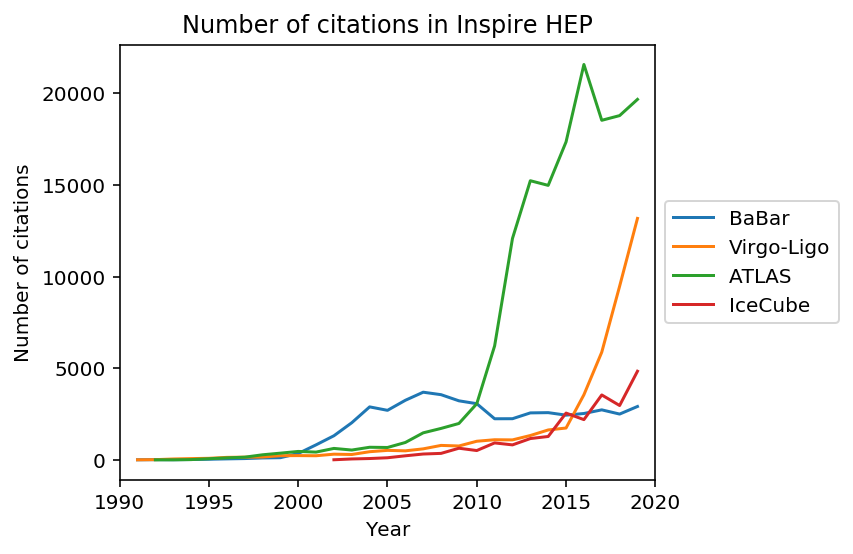

In [157]:
fig = plt.figure()
ax = plt.subplot(111)

# collaborationName = "IceCube"

for collaborationName in citationsPerYearByProject:
  projectCitations = citationsPerYearByProject[collaborationName]
  years = []
  citations = []
  cumulativeCitations = []
  allCitations = 0;
  startYear = 1990
  for year in sorted(projectCitations.keys()):
    allCitations+=projectCitations[year];
    if year>=startYear and year !=2020:
      years.append(year);
      citations.append(projectCitations[year])
      cumulativeCitations.append(allCitations)

  ax.plot(years,citations,label=collaborationName);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_title("Number of citations in Inspire HEP")
ax.set_xlabel("Year")
ax.set_ylabel("Number of citations")
ax.set_xlim(startYear,2020)
plt.savefig("../Figures/yearlyCitations.pdf")
plt.show()

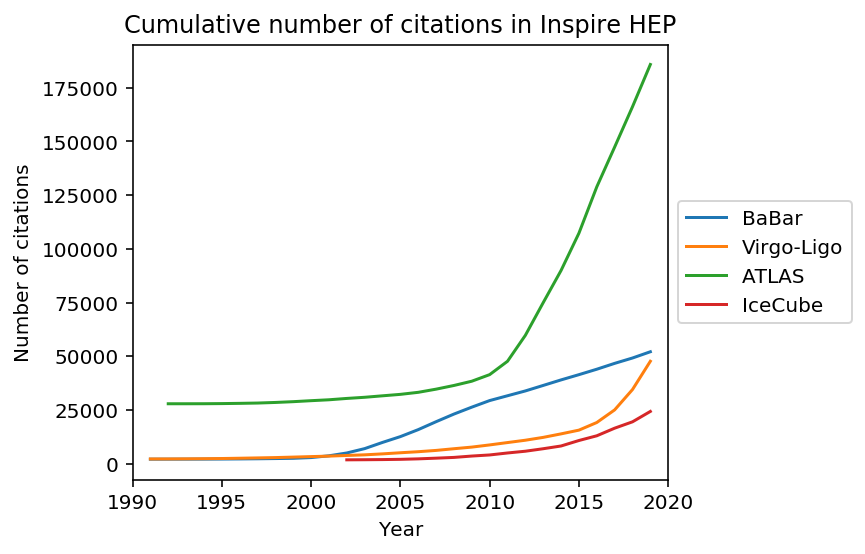

In [159]:
fig = plt.figure()
ax = plt.subplot(111)

# collaborationName = "IceCube"

for collaborationName in citationsPerYearByProject:
  projectCitations = citationsPerYearByProject[collaborationName]
  years = []
  citations = []
  cumulativeCitations = []
  allCitations = 0;
  startYear = 1990
  for year in sorted(projectCitations.keys()):
    allCitations+=projectCitations[year];
    if year>=startYear and year !=2020:
      years.append(year);
      citations.append(projectCitations[year])
      cumulativeCitations.append(allCitations)

  ax.plot(years,cumulativeCitations,label=collaborationName);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_title("Cumulative number of citations in Inspire HEP")
ax.set_xlabel("Year")
ax.set_ylabel("Number of citations")
ax.set_xlim(startYear,2020)
plt.savefig("../Figures/yearlyCumulativeCitations.pdf")
plt.show()

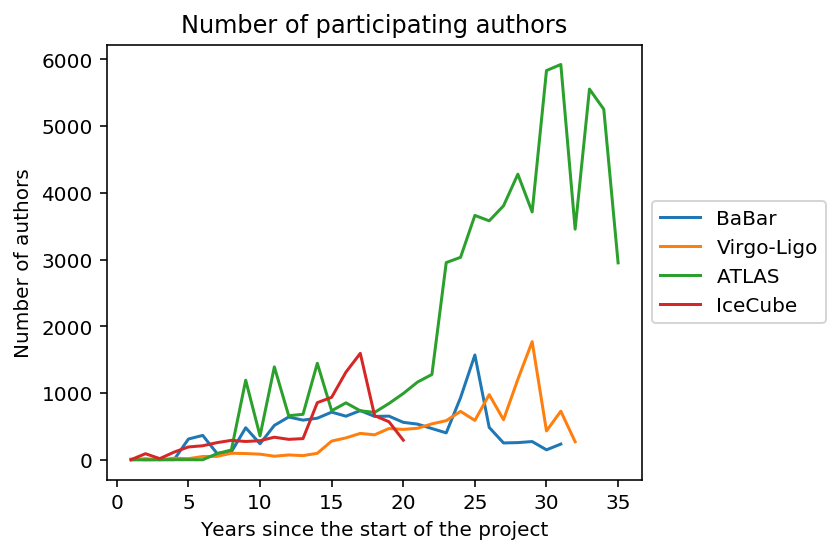

In [177]:
fig = plt.figure()
ax = plt.subplot(111)

for collaborationName in authorCountsByProject:
  plotAuthorsYears,plotPaticipatingAuthorsCount = authorCountsByProject[collaborationName];
  ax.plot(range(1,len(plotPaticipatingAuthorsCount)+1),plotPaticipatingAuthorsCount,label=collaborationName);
  
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_title("Number of participating authors")
ax.set_xlabel("Years since the start of the project")
ax.set_ylabel("Number of authors")
plt.savefig("../Figures/participatingAuthors.pdf")
plt.show()

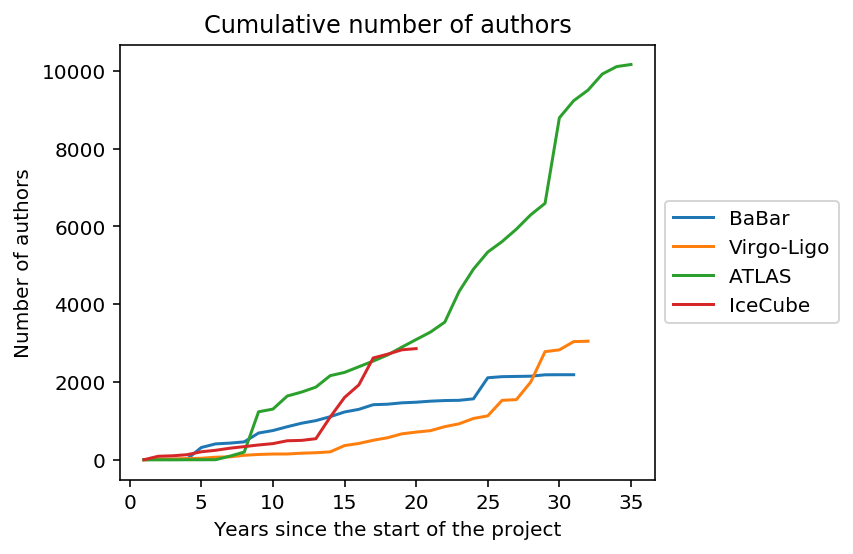

In [178]:
fig = plt.figure()
ax = plt.subplot(111)

for collaborationName in authorCountsByProject:
  plotAuthorsYears,plotAllTimeAuthorsCount = authorAllTimeCountsByProject[collaborationName];
  ax.plot(range(1,len(plotAllTimeAuthorsCount)+1),plotAllTimeAuthorsCount,label=collaborationName);
  
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_title("Cumulative number of authors")
ax.set_xlabel("Years since the start of the project")
ax.set_ylabel("Number of authors")
plt.savefig("../Figures/cumulativeAuthors.pdf")
plt.show()

In [131]:
authorshipsByDecadeByCollaboration = {}
for collaborationName in HEPEntriesByCollaboration:
  entries = HEPEntriesByCollaboration[collaborationName];
  authorshipsPerYear = {};
  institutionsPerYear = {};
  for entry in entries:
#     if(entry["Type"]!='published'):
#       continue;
    year = entry["Year"]
    if(year is not None):
      authorshipCount = 0;
      authors = [];
      if "FirstAuthor" in entry and entry["FirstAuthor"] is not None:
        authors += [entry["FirstAuthor"]];
      if "Authors" in entry and entry["Authors"] is not None:
        authors += entry["Authors"];
      institutionCount = len({int(author["Institution ID"]) for author in authors if "Institution ID" in author and author["Institution ID"] is not None})
      authorshipCount=len(authors);
      if(year not in authorshipsPerYear):
        authorshipsPerYear[year] = [];
        institutionsPerYear[year] = [];
      if(authorshipCount>3):
        authorshipsPerYear[year].append(authorshipCount);
      if(institutionCount>3):
        institutionsPerYear[year].append(institutionCount);
  
  minYear = min(authorshipsPerYear.keys());
  maxYear = max(authorshipsPerYear.keys());
  
  authorshipsPerDecade = []
  institutionsPerDecade = []
  decadeStartingYears = []
  decadeEndingYears = []
  for decadeStart in range(minYear,maxYear+1,10):
    decadeStartingYears.append(decadeStart);
    decadeEndingYears.append(decadeStart);
    authorships = [];
    institutions = [];
    for year in range(decadeStart,decadeStart+10,1):
      if(year in authorshipsPerYear):
        decadeEndingYears[-1] = year;
        authorships+=authorshipsPerYear[year]
        institutions+=institutionsPerYear[year]
    authorshipsPerDecade.append(sorted(authorships,reverse=True))
    institutionsPerDecade.append(sorted(institutions,reverse=True))
  authorshipsByDecadeByCollaboration[collaborationName] = (decadeStartingYears,decadeEndingYears,authorshipsPerDecade,institutionsPerDecade)


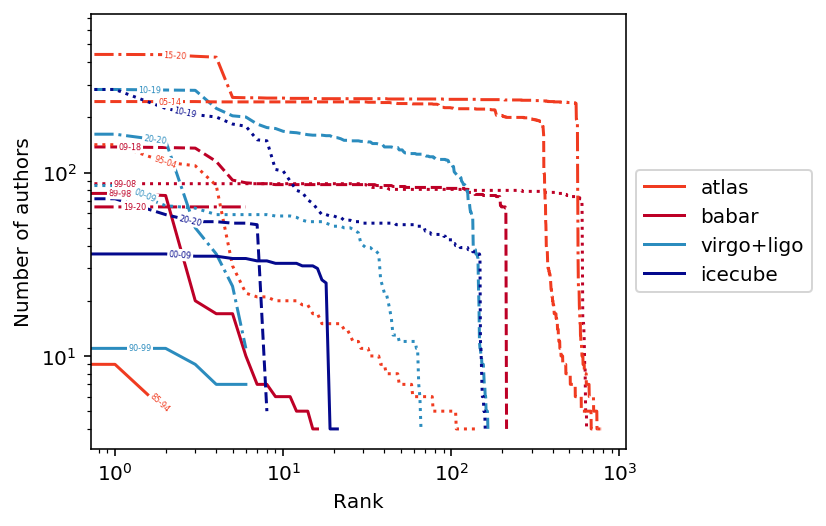

In [142]:
from labellines import labelLine, labelLines
from matplotlib.lines import Line2D

styles = {
  0: "-",
  1: ":",
  2: "--",
  3: "-.",
}

colors = {
  "atlas": np.array([240,59,32])/255.0,
  "babar": np.array([189,0,38])/255.0,
  "virgo+ligo": np.array([43,140,190])/255.0,
  "icecube": np.array([4,9,141])/255.0,
}



fig = plt.figure()
ax = plt.subplot(111)


for collaborationName in authorshipsByDecadeByCollaboration:
  decadeStartingYears,decadeEndingYears,authorshipsPerDecade,institutionsPerDecade = authorshipsByDecadeByCollaboration[collaborationName];
  for decadeIndex in range(len(authorshipsPerDecade)):
    authorships = institutionsPerDecade[decadeIndex];
    decadeStart = decadeStartingYears[decadeIndex];
    decadeEnd = decadeEndingYears[decadeIndex];
    ax.plot(range(len(authorships)),authorships,
            linestyle=styles[decadeIndex],
            color=colors[collaborationName],
#             label=collaborationName+"(%d-%d)"%(decadeStart,decadeEnd));
            label=("%d"%(decadeStart))[-2:]+"-"+("%d"%(decadeEnd))[-2:]);

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


handlers = {key:Line2D([0], [0], color=color) for key,color in colors.items()};
ax.legend(handlers.values(),handlers.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_xscale("log");
ax.set_yscale("log");
# ax.set_title("Cumulative number of authors ")
ax.set_xlabel("Rank")
ax.set_ylabel("Number of authors")

labelLines(plt.gca().get_lines(),xvals=(1.0,3),fontsize=4, zorder=2.5,
          bbox=dict(edgecolor="white",facecolor='white', alpha=1.0,pad=0.25))

plt.savefig("../Figures/authorsOverDecades.pdf")
plt.show()
  

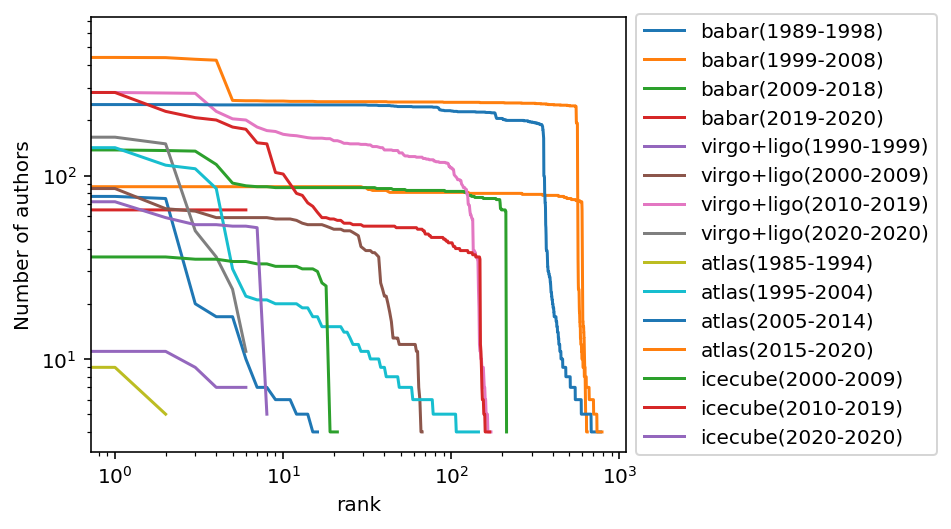

In [143]:
from labellines import labelLine, labelLines
fig = plt.figure()
ax = plt.subplot(111)

for collaborationName in authorshipsByDecadeByCollaboration:
  decadeStartingYears,decadeEndingYears,authorshipsPerDecade,institutionsPerDecade = authorshipsByDecadeByCollaboration[collaborationName];
  for decadeIndex in range(len(authorshipsPerDecade)):
    authorships = institutionsPerDecade[decadeIndex];
    decadeStart = decadeStartingYears[decadeIndex];
    decadeEnd = decadeEndingYears[decadeIndex];
    ax.plot(range(len(authorships)),authorships,label=collaborationName+"(%d-%d)"%(decadeStart,decadeEnd));
  
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Put a legend to the right of the current axis
ax.set_xscale("log");
ax.set_yscale("log");
# ax.set_title("Cumulative number of authors ")
ax.set_xlabel("rank")
ax.set_ylabel("Number of authors")
plt.show()
  

In [179]:
HEPID2Index = {entry["ID"]:i for i,entry in enumerate(HEPEntries)}

In [180]:
# normalizing type and adding data to HEPEntries
for entry in tqdm(HEPEntries):
  if(entry["Type"] is not None):
    entry["Type"]=set([a.lower() for a in entry["Type"]])
    
for entry in tqdm(dataEntries):
  mainPublicationID = entry['MainPublication']
  if(mainPublicationID is not None):
    if(mainPublicationID in HEPID2Index):
      publicationIndex = HEPID2Index[mainPublicationID];
      if(HEPEntries[publicationIndex]["Type"] is not None):
        HEPEntries[publicationIndex]["Type"].add("data");
      else:
        HEPEntries[publicationIndex]["Type"] = set("data");

In [182]:
types = []
for name in HEPEntriesByCollaboration:
  for entry in tqdm(HEPEntriesByCollaboration[name]):
    if(entry is not None):
      types+=([a.lower() for a in entry["Type"]])
Counter(types)

Counter({'hep': 18523,
         'conferencepaper': 10102,
         'core': 17116,
         'citeable': 13602,
         'review': 164,
         'report': 36,
         'published': 3428,
         'proceedings': 9,
         'introductory': 22,
         'arxiv': 3184,
         'thesis': 2413,
         'book': 12,
         'lectures': 12,
         'data': 508,
         'fermilab': 88,
         'note': 3821,
         'bookchapter': 14,
         'noncore': 11,
         'withdrawn': 1})

In [183]:
np.sum(list(Counter(types).values()))

73066

In [165]:
HEPEntries[HEPID2Index["1343948"]]["Type"]

{'arxiv', 'citeable', 'conferencepaper', 'core', 'hep'}

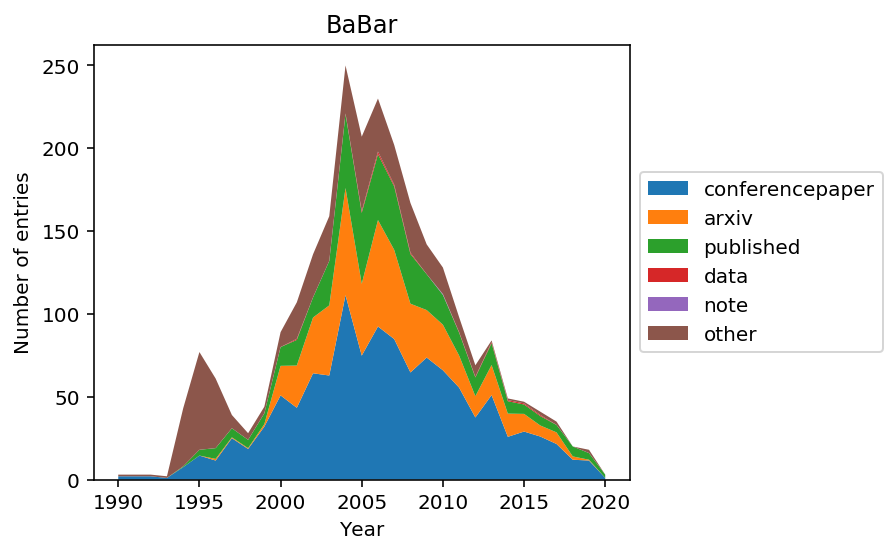

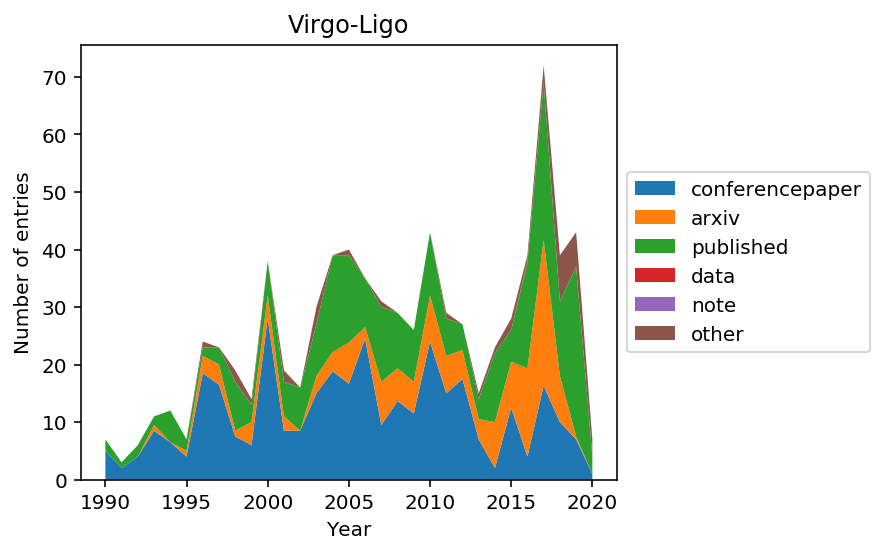

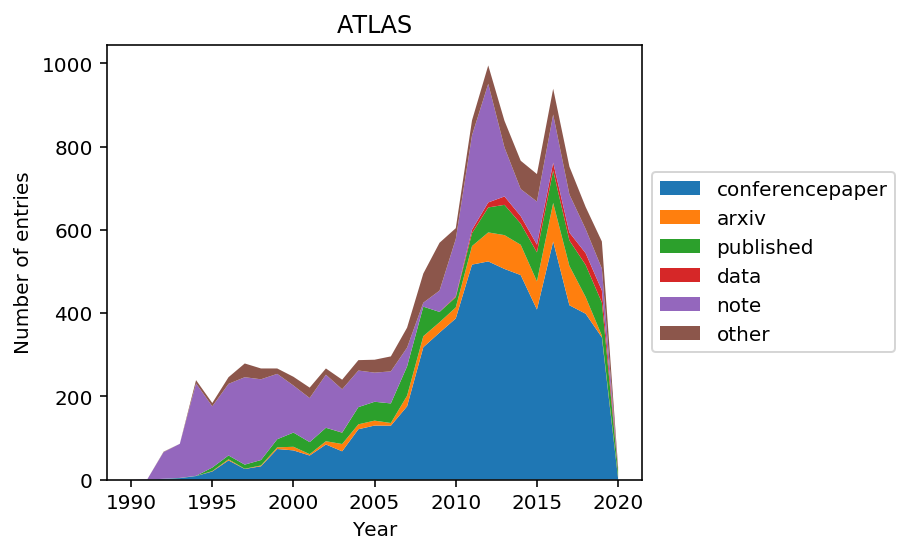

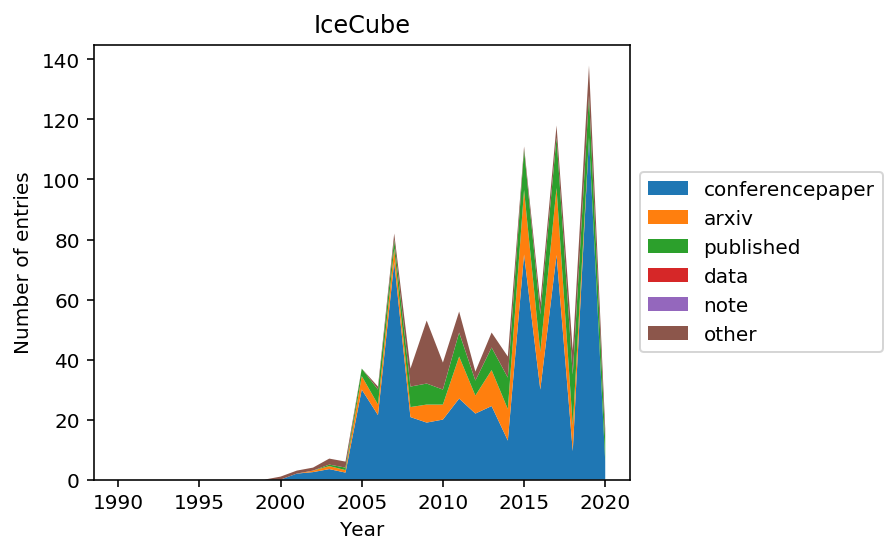

In [184]:
minYear = 1990
from collections import OrderedDict
allowedTypes = OrderedDict([
('conferencepaper',0),
('arxiv',0),
('published',0),
('data',0),
# ('proceedings',0),
('note',0),
# ('review',0),
# ('book',0),
# ('citeable',0),
# ('hep',0),
# ('withdrawn',0),
# ('core',0),
# ('thesis',0),
# ('introductory',0),
# ('lectures',0),
# ('fermilab',0),
# ('bookchapter',0),
# ('activityreport',0),
# ('report',0),
# ('noncore',0),
# ('d0-preliminary-note',0),
]);

for collaborationName in tqdm(HEPEntriesByCollaboration):
  collaborationHEPEntries = HEPEntriesByCollaboration[collaborationName];
  
  collaborationYears = [entry["Year"] for entry in collaborationHEPEntries];

  if(minYear==0):
    minYear = min([year for year in collaborationYears if year is not None]);

  if(finalYear==0):
    finalYear = max([year for year in collaborationYears if year is not None]);

  plotDictionary = OrderedDict((typeName,[0]*(finalYear-minYear+1)) for typeName in allowedTypes)
  plotDictionary["other"] = [0]*(finalYear-minYear+1)
  
  for currentYear in range(minYear,finalYear+1):
    yearEntries = [entry for entry in collaborationHEPEntries if entry["Year"] is not None and entry["Year"]==currentYear]
    yearIndex = currentYear-minYear;
    for entry in yearEntries:
      if entry["Type"] is not None:
        sharedTypes = entry["Type"].intersection(allowedTypes);
        if(sharedTypes):
          weight = len(sharedTypes);
          for key in sharedTypes:
            plotDictionary[key][yearIndex] += 1.0/weight;
        else:
            plotDictionary["other"][yearIndex] += 1.0;
#   plotDictionary = 
  fig = plt.figure()
  ax = plt.subplot(111)

  ax.stackplot(range(minYear,finalYear+1),list(plotDictionary.values()),labels=list(plotDictionary.keys()))

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_title(collaborationName)
  ax.set_xlabel("Year")
  ax.set_ylabel("Number of entries")
  plt.savefig("../Figures/output_%s.pdf"%collaborationName)
  plt.show()

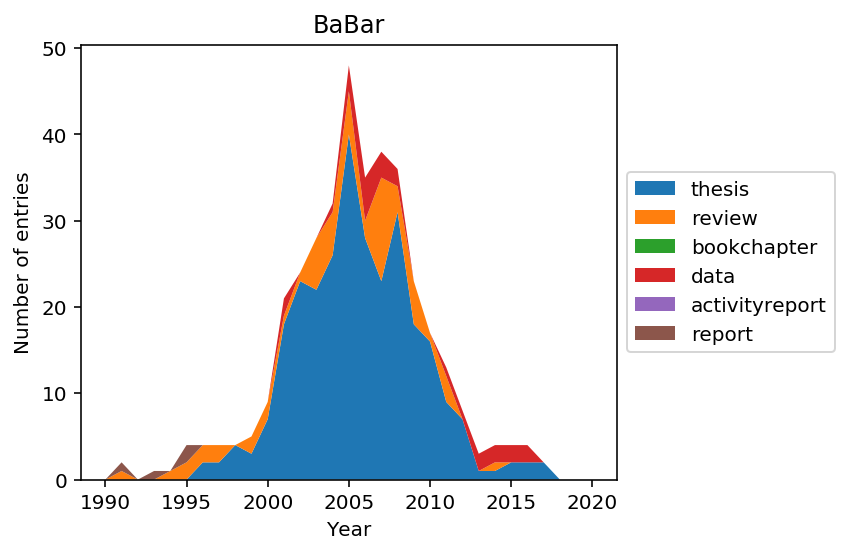

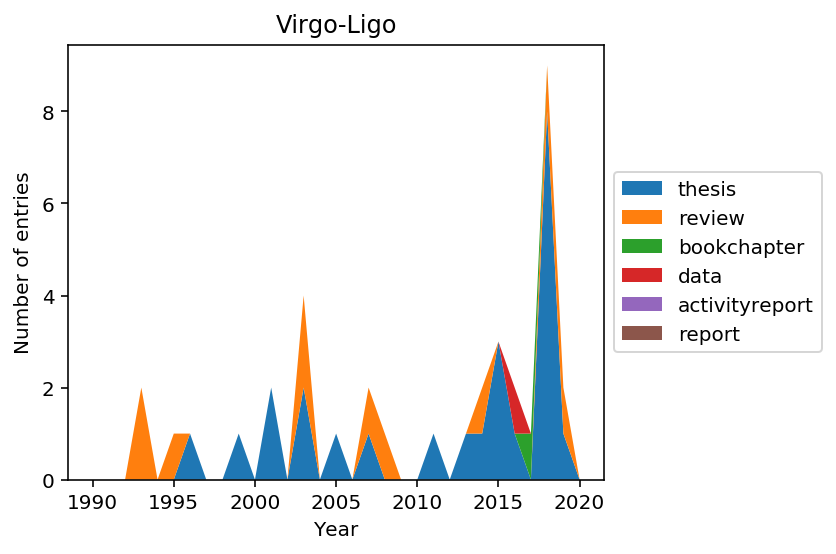

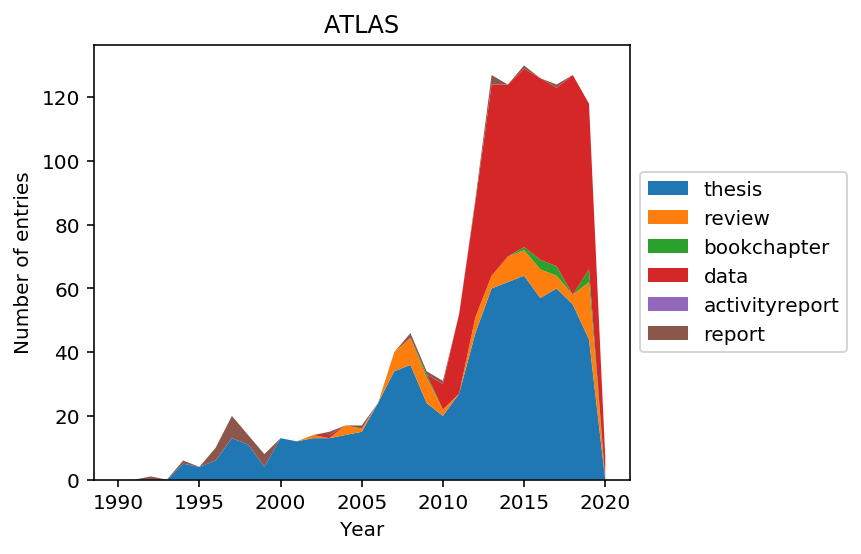

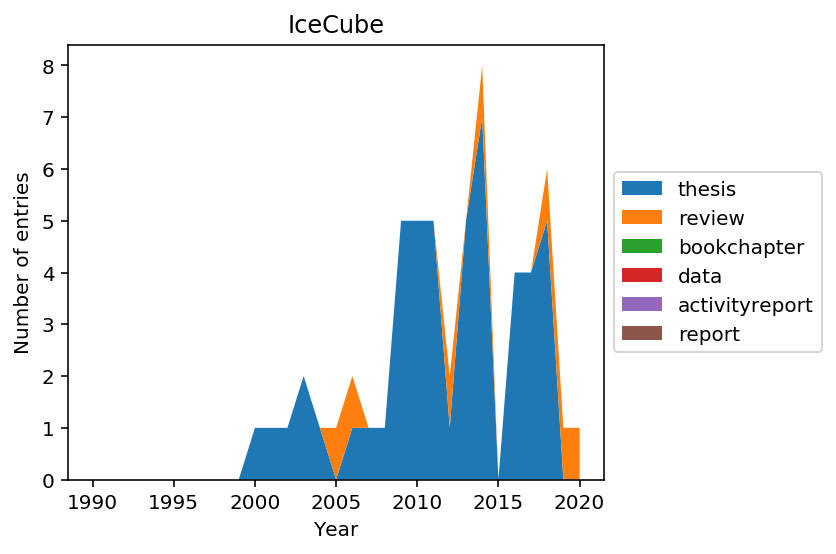

In [185]:
minYear=1990
allowedTypes = OrderedDict([
# ('conferencepaper',0),
# ('arxiv',0),
# ('published',0),
# ('proceedings',0),
# ('note',0),
('thesis',0),
('review',0),
# ('book',0),
('bookchapter',0),
('data',0),
('activityreport',0),
('report',0),
# ('citeable',0),
# ('hep',0),
# ('withdrawn',0),
# ('core',0),
# ('introductory',0),
# ('lectures',0),
# ('fermilab',0),
# ('noncore',0),
# ('d0-preliminary-note',0),
]);


for collaborationName in tqdm(HEPEntriesByCollaboration):
  collaborationHEPEntries = HEPEntriesByCollaboration[collaborationName];
  
  collaborationYears = [entry["Year"] for entry in collaborationHEPEntries];

  if(minYear==0):
    minYear = min([year for year in collaborationYears if year is not None]);

  if(finalYear==0):
    finalYear = max([year for year in collaborationYears if year is not None]);

  plotDictionary = OrderedDict((typeName,[0]*(finalYear-minYear+1)) for typeName in allowedTypes)
#   plotDictionary["other"] = [0]*(finalYear-minYear+1)
  
  for currentYear in range(minYear,finalYear+1):
    yearEntries = [entry for entry in collaborationHEPEntries if entry["Year"] is not None and entry["Year"]==currentYear]
    yearIndex = currentYear-minYear;
    for entry in yearEntries:
      if entry["Type"] is not None:
        sharedTypes = entry["Type"].intersection(allowedTypes);
        if(sharedTypes):
          weight = len(sharedTypes);
          for key in sharedTypes:
            plotDictionary[key][yearIndex] += 1.0/weight;
#         else:
#             plotDictionary["other"][yearIndex] += 1.0;
#   plotDictionary = 
  fig = plt.figure()
  ax = plt.subplot(111)

  ax.stackplot(range(minYear,finalYear+1),list(plotDictionary.values()),labels=list(plotDictionary.keys()))

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_title(collaborationName)
  ax.set_xlabel("Year")
  ax.set_ylabel("Number of entries")
  plt.savefig("../Figures/output_Other_%s.pdf"%collaborationName)
  plt.show()

In [426]:
np.cumsum(list(plotDictionary.values()))

array([ 2.,  2.,  2.,  3.,  6., 11., 14., 16., 16., 16., 17., 18., 20.,
       22., 24., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26.])

[[2.0,
  0,
  0,
  1.0,
  3.0,
  5.0,
  3.0,
  2.0,
  0,
  0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  0,
  0,
  0,
  0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [295]:
with open("../Data/Institutions.tsv","w") as fd:
  fd.write("\t".join(["Name","Field","CountryCode","Country","City","URL"])+"\n")
  for entry in institutionsEntries:
    data = [];
    propertyName = "Name"
    if(propertyName in entry and entry[propertyName] is not None):
      data.append(entry[propertyName])
    else:
      data.append("None")
      
    propertyName = "Field"
    if(propertyName in entry and entry[propertyName] is not None):
      data.append(entry[propertyName])
    else:
      data.append("None")
    
    if("Address" in entry and entry["Address"] is not None):
      addressEntry = entry["Address"]
      propertyName = "CountryCode"
      if(propertyName in addressEntry and addressEntry[propertyName] is not None):
        data.append(addressEntry[propertyName])
      else:
        data.append("")
      propertyName = "Country"
      if(propertyName in addressEntry and addressEntry[propertyName] is not None):
        data.append(addressEntry[propertyName])
      else:
        data.append("")
      propertyName = "City"
      if(propertyName in addressEntry and addressEntry[propertyName] is not None):
        data.append(addressEntry[propertyName])
      else:
        data.append("")
    else:
      data+=["None"]*4;
    propertyName = "URL"
    if(propertyName in entry and entry[propertyName] is not None):
      data.append(entry[propertyName])
    fd.write("\t".join(data)+"\n");

In [294]:
institutionsEntries[0]

{'ID': '902624',
 'Geolocation': {'Lon': '6.07532', 'Lat': '50.7736'},
 'Name': 'Aachen, Tech. Hochsch.',
 'InstitutionData': {'Institution': 'Rheinisch-Westfälische Technische Hochschule (RWTH)',
  'Department': 'Physikalisches Institut',
  'ICN': 'RWTH, Aachen, Phys. Inst.'},
 'Address': {'Address': 'Sommerfeldstrasse 14',
  'City': 'Aachen',
  'Country': 'Germany',
  'PostalCode': '52056',
  'CountryCode': 'DE'},
 'Field': 'Research center',
 'Accronyms': ['Aachen Tech. Hochsch.', 'Elementarteilchenphysik'],
 'Extra': ['I. Physikalisches Institut'],
 'Related': [{'type': 't', 'ID': '910724'}],
 'URL': 'http://www.physik.rwth-aachen.de/',
 'Tags': ['INSTITUTION', 'CORE']}

In [198]:
collaborationName

'icecube'

In [189]:
import geopy.distance
projects = [
  ("BaBar", 1989,1990,2020),
  ("Virgo-Ligo", 1988,1989,2020),
  ("ATLAS", 1985,1992,2020),
  ("IceCube", 2000,2003,2020),
]

plotDataForCollaboration = {}
for collaborationName,minYear,startYear,maxYear in tqdm(projects):
  countriesByYear = []
  averageDistanceByYear = []
  stdDistanceByYear = []
  years = []
  for year in tqdm(range(startYear,maxYear)):
    g = xn.xnet2igraph("../Data/Networks/network_%s_%d_%d_geo.xnet"%(collaborationName,minYear,year));
    countries = set(g.vs["CountryCode"]);
    positions = g.vs["Position"];
    distances = []
    for fromIndex in range(len(positions)):
      fromLon,fromLat = positions[fromIndex]
      for toIndex in range(fromIndex+1,len(positions)):
        toLon,toLat = positions[toIndex]
        distances.append(geopy.distance.geodesic((fromLat,fromLon),(toLat,toLon)).km)
    averageDistanceByYear.append(np.average(distances))
    stdDistanceByYear.append(np.std(distances))
    years.append(year);
    countriesByYear.append(len(countries))
  plotDataForCollaboration[collaborationName] = (countriesByYear,averageDistanceByYear,stdDistanceByYear,years)


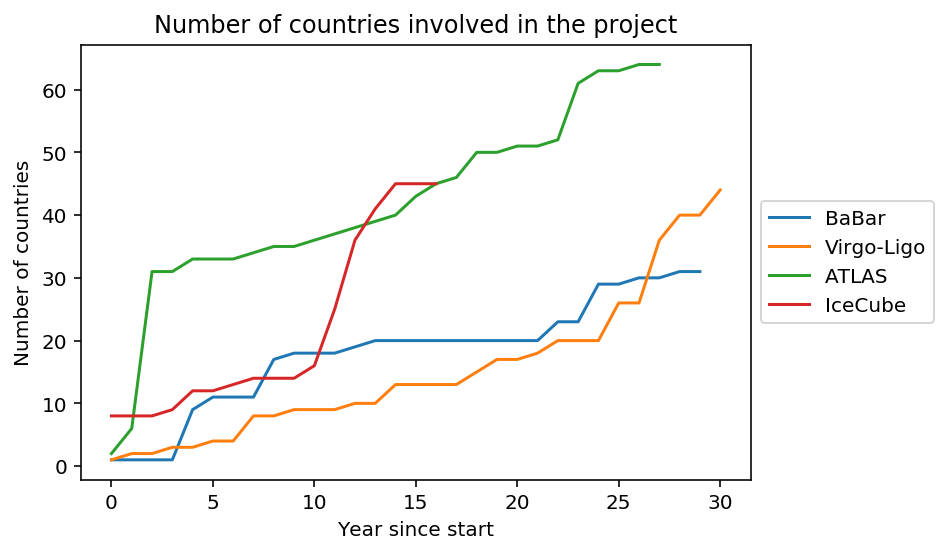

In [196]:
fig = plt.figure()
ax = plt.subplot(111)
for collaborationName in plotDataForCollaboration:
  countriesByYear,averageDistanceByYear,stdDistanceByYear,years = plotDataForCollaboration[collaborationName]
  ax.plot(range(len(years)),countriesByYear,label=collaborationName);

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Number of countries involved in the project")
ax.set_xlabel("Year since start")
ax.set_ylabel("Number of countries")
plt.savefig("../Figures/countries.pdf")
plt.show()

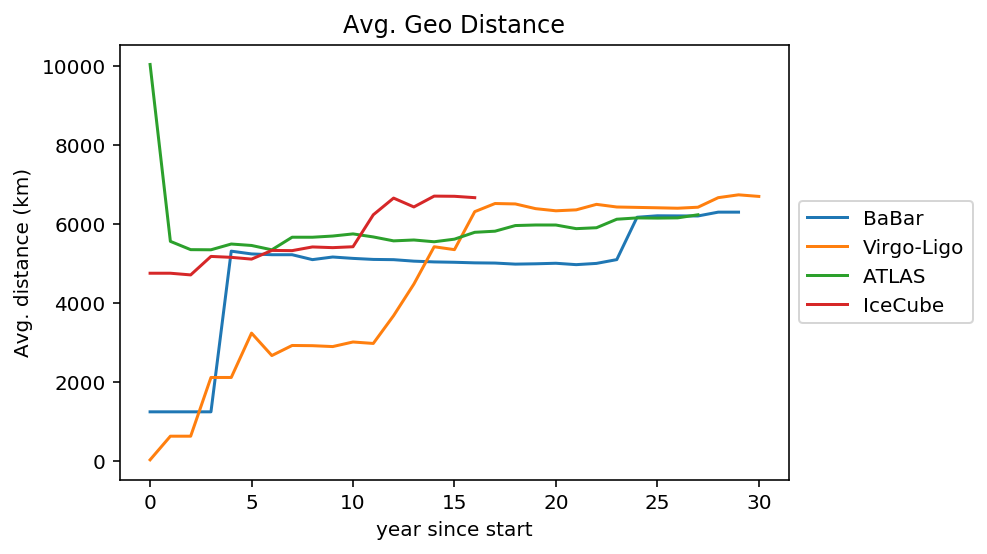

In [193]:
fig = plt.figure()
ax = plt.subplot(111)
for collaborationName in plotDataForCollaboration:
  countriesByYear,averageDistanceByYear,stdDistanceByYear,years = plotDataForCollaboration[collaborationName]
  averageDistanceByYear = np.array(averageDistanceByYear)
  stdDistanceByYear = np.array(stdDistanceByYear)
  ax.plot(range(len(years)),averageDistanceByYear,label=collaborationName);
#   ax.fill_between(range(len(years)),averageDistanceByYear-stdDistanceByYear,averageDistanceByYear+stdDistanceByYear,alpha=0.2);
	
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Avg. Geo Distance")
ax.set_xlabel("year since start")
ax.set_ylabel("Avg. distance (km)")
plt.show()